<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/speed.png?raw=true" width=800 align="left"/>

# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [6]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [8]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [10]:
# 기술통계 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [12]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

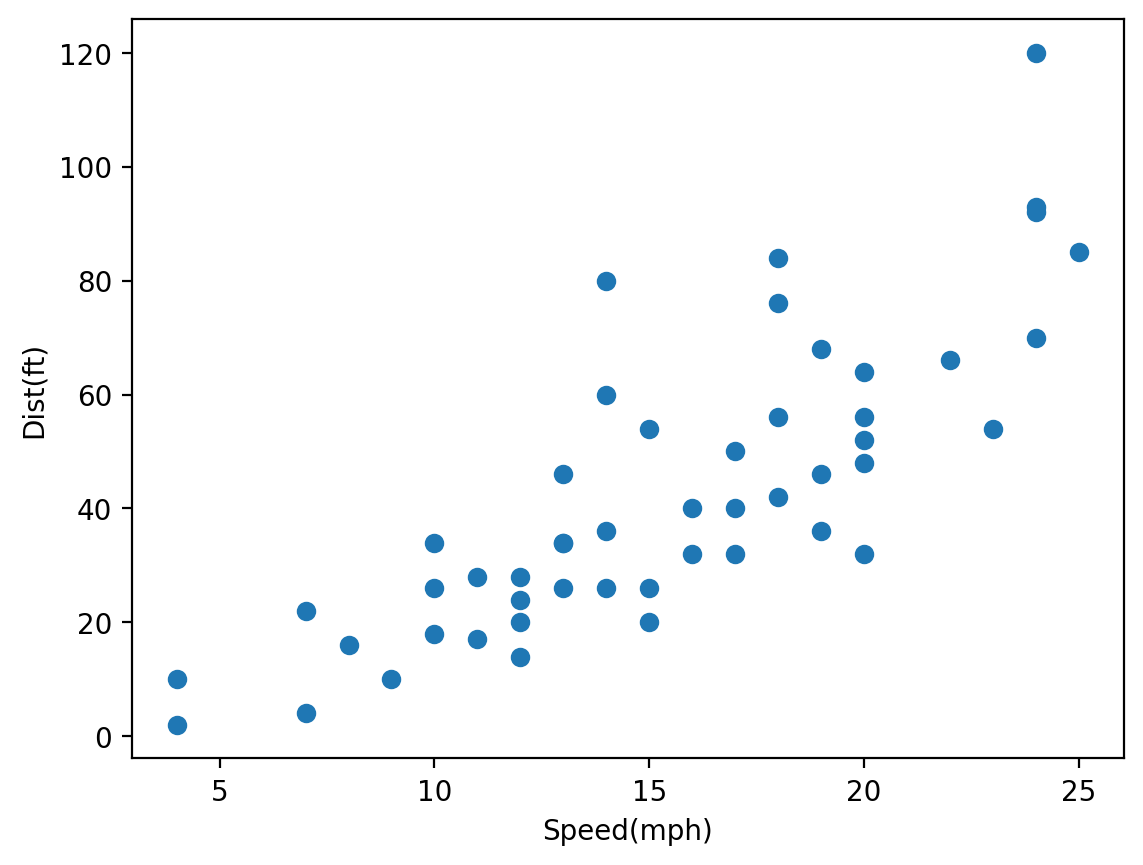

In [14]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다.
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [16]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(columns=target)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [18]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [20]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression


In [22]:
# 2단계: 선언하기
model = LinearRegression()

In [24]:
# 3단계: 학습하기
model.fit(x_train,y_train)

LinearRegression()

# 4단계: 예측하기
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import mean_absolute_error , r2_score
#5단계: 평가하기
print('MAE',mean_absolute_error(y_test, y_pred))
print("R2",r2_score(y_test, y_pred))


MAE 15.113442990354987
R2 0.5548332681132087


- 회귀 계수를 살펴봅니다.

In [32]:
# 회귀계수 확인
print(model.coef_) # 회귀계수들
print(model.intercept_)# 상수 indercept

[3.91046344]
-16.373364149357656


$$ Distance = 3.91 * speed - 16.37 $$

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

In [59]:
# 회귀식 시각
# distance = a * speed + b 

a = model.coef_
b = model .intercept_
speed = [x_train.min(), x_train.max()]
speed = [i for i in range(0,25)]
dist = a * speed +b
print(speed)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<function matplotlib.pyplot.show(close=None, block=None)>

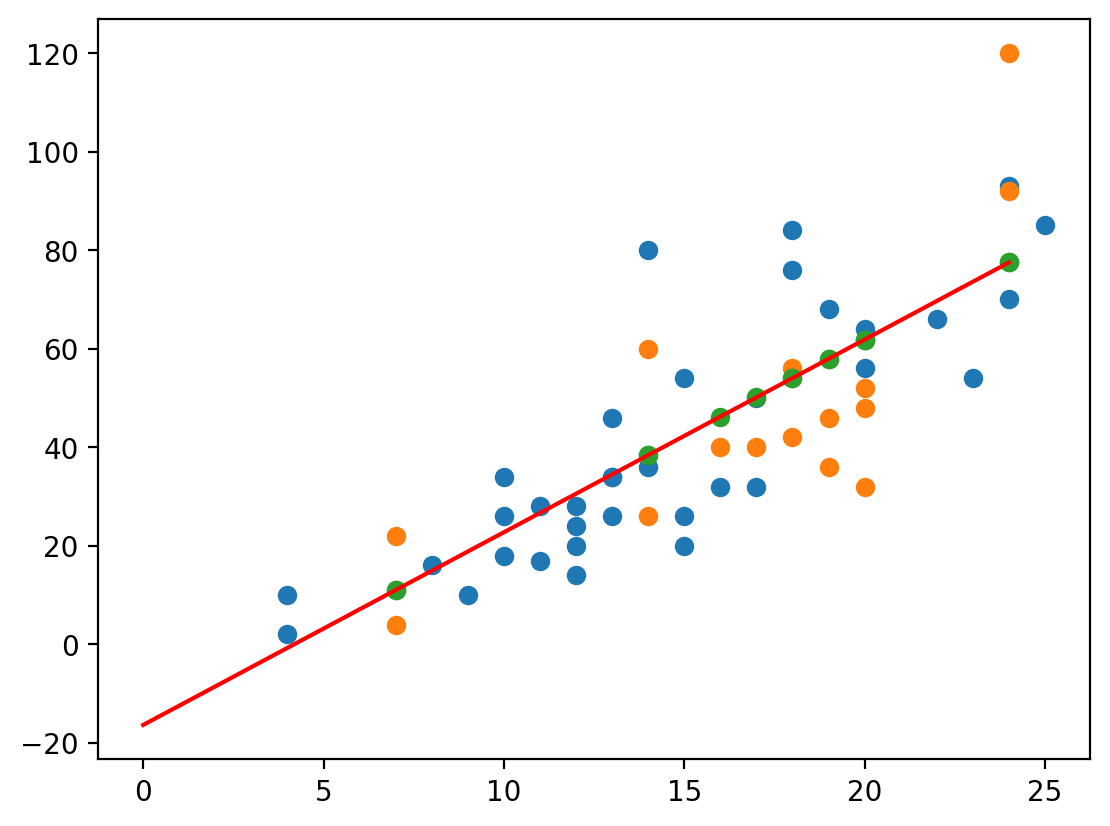

In [63]:
# 회귀선 시각화 
plt.scatter(x_train,y_train)# 학습했던 값
plt.scatter(x_test,y_test)# 예측했어야할 값
plt.scatter(x_test,y_pred)# 예측한 값  >> 이를 기준으로 회귀선을 만듦
plt.plot(speed, dist, color ='r') # x_test를 받아 y_pred 선을 만듦

plt.show

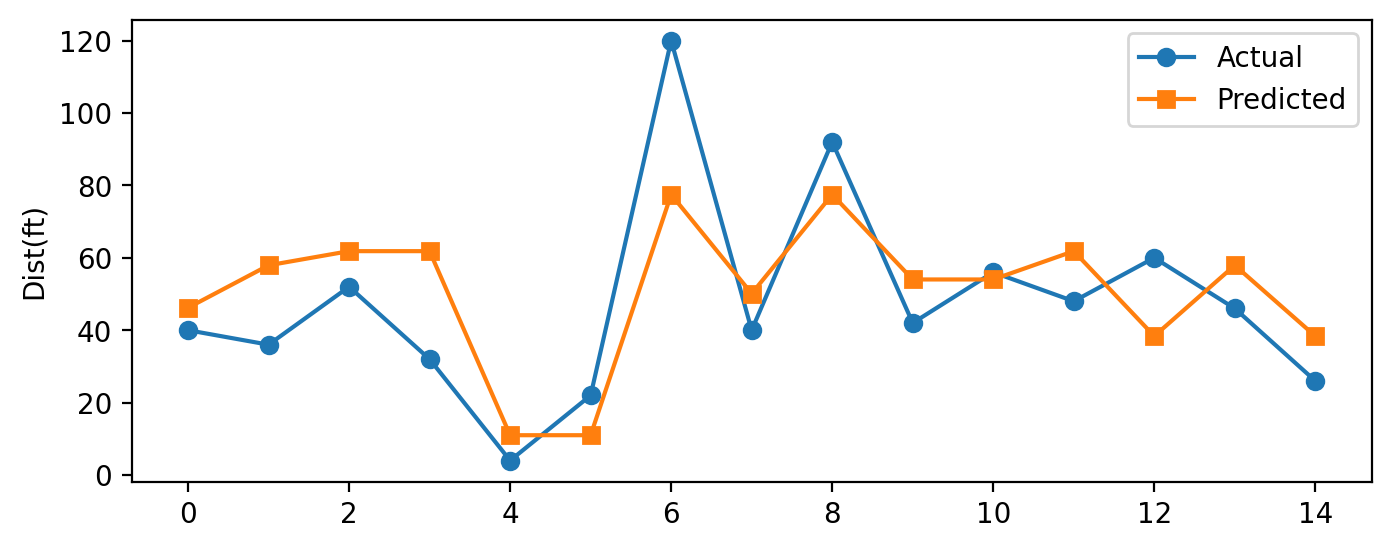

In [81]:
# 시각화
plt.figure(figsize = (8,3))
plt.plot(y_test.values, marker = 'o',label='Actual')
plt.plot(y_pred, marker = 's',label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()